# Paragraph Statistics

Investigate the statistics of paragraph properties.

Main goal is to inform embedding strategy.

Look at:
- tokens per paragraph
- total tokens in book
- outliers: short/long paragraphs


## Read paragraphs

In [17]:
import weaviate
from weaviate.classes.query import Sort
import pandas as pd

In [2]:
client = weaviate.connect_to_local()

In [3]:
paragraph_collection = client.collections.get("Paragraphs")

In [4]:
paragraphs = paragraph_collection.query.fetch_objects(limit=None,sort=Sort.by_property(name="book_index").by_property(name="chapter_index").by_property(name="paragraph_index"))

In [5]:
paragraphs = [object.properties for object in paragraphs.objects]

In [6]:
len(paragraphs)

3123

In [7]:
paragraphs

[{'text': 'BEFO RE HI ST O RY When does History begin? It is tempting to reply ‘in the beginning’, but like many obvious answers, this soon turns out to be unhelpful. As a great Swiss historian once pointed out in another connection, history is the one subject where you cannot begin at the beginning. We can trace the chain of human descent back to the appearance of vertebrates, or even to the photosynthetic cells and other basic structures which lie at the start of life itself. We can go back further still, to the almost unimaginable upheavals which formed this planet and even to the origins of the universe. Yet this is not ‘history’.',
  'paragraph_index': 0,
  'page': 19,
  'chapter_index': 0,
  'book_index': 0},
 {'text': 'Common sense helps here: history is the story of mankind, of what it has done, suffered or enjoyed. We all know that dogs and cats do not have histories, while human beings do. Even when historians write about a natural process beyond human control, such as the up

In [18]:
paragraphs_df = pd.DataFrame(paragraphs)
paragraphs_df.head()

,text,paragraph_index,page,chapter_index,book_index
0,BEFO RE HI ST O RY When does History begin? It...,0,19,0,0
1,Common sense helps here: history is the story ...,1,19,0,0
2,This suggests that all we have to do is to ide...,2,19,0,0
3,What is surely and identifiably unique about t...,3,20,0,0
4,The roots of history lie in the pre-human past...,0,21,1,0


## Token stats

In [27]:
import tiktoken
import matplotlib.pyplot as plt
import numpy as np
from history_book.utils.utils import print_with_wrapping

In [9]:
# get token length of each paragraph
# use openai's tokenizer
tokenizer = tiktoken.get_encoding("cl100k_base")
def count_tokens(text):
    return len(tokenizer.encode(text))

In [19]:
paragraphs_df['token_length'] = paragraphs_df['text'].apply(count_tokens)

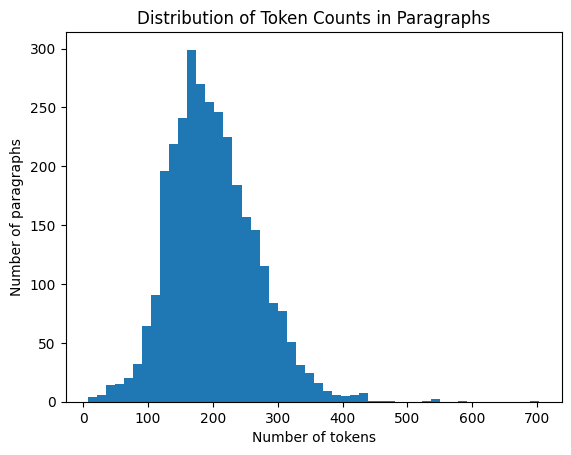

In [20]:
plt.hist(paragraphs_df['token_length'], bins=50)
plt.xlabel("Number of tokens")
plt.ylabel("Number of paragraphs")
plt.title("Distribution of Token Counts in Paragraphs")
plt.show()

### Total token count --- estimate OpenAI pricing

In [32]:
n_total = np.sum(paragraphs_df['token_length'])
print(n_total)

626187


OpenAI: text-embedding-3-small costs $0.02 per 1M tokens, text-embedding-3-large costs $0.13 per token.

Both of these are dirt cheap to vectorize the whole book.

### Check short paragraphs

These seem to all be paragraphs that got cut off between pages, and between sentences so they weren't stitched back together.

In [31]:
for row in paragraphs_df[paragraphs_df['token_length'] < 50].iterrows():
    print(f"Book: {row[1]['book_index']}, Chapter: {row[1]['chapter_index']}, Paragraph: {row[1]['paragraph_index']}, Page: {row[1]['page']}")
    print_with_wrapping(row[1]['text'])
    print("\n\n")


Book: 0, Chapter: 1, Paragraph: 7, Page: 25
Some of those species form part of the human evolutionary story, and all the
most important stages in that evolution – so far observed – have been located in
Africa, far from the ice-fields.



Book: 1, Chapter: 2, Paragraph: 29, Page: 101
The sudden appearance of a great individual then opens a new phase.



Book: 1, Chapter: 3, Paragraph: 6, Page: 113
Everything seems suddenly to be emerging at once, almost without antecedents,
and to this epoch belongs the basic political structure of the future kingdom.



Book: 1, Chapter: 4, Paragraph: 21, Page: 150
It is only possible to guess about what happened and the view which does least
violence to the lack of evidence is that there was a natural cataclysm
originating in Thera which broke the back of Minoan civilization.



Book: 1, Chapter: 4, Paragraph: 35, Page: 156
What replaced them was the physical transference of people, sometimes taking
centuries to establish new settled patterns, but in 

### Check long paragraphs

Just long -- nothing weird.

In [35]:
for row in paragraphs_df[paragraphs_df['token_length'] > 500].iterrows():
    print(f"Token length: {row[1]['token_length']}, Book: {row[1]['book_index']}, Chapter: {row[1]['chapter_index']}, Paragraph: {row[1]['paragraph_index']}, Page: {row[1]['page']}")
    print_with_wrapping(row[1]['text'])
    print("\n\n")

Token length: 703, Book: 0, Chapter: 1, Paragraph: 29, Page: 36
In such matters it is best to be cautious. The evidence can take us only a very
little way. Moreover, it is drawn from a very long span of time, a huge period
which would have given time for considerable physical, psychological and
technological evolution. The earliest forms of Homo erectus may not have been
much like the last, some of whom have been classified by some scientists as
archaic forms of the next evolutionary stage of the hominin line. Yet all
reflections support the general hypothesis that the changes in hominins
observable while Homo erectus occupies the centre of our stage were especially
important in defining the arcs within which humanity was to evolve. He had
unprecedented capacity to manipulate his environment, feeble though his handhold
on it may seem to us. Besides the hand-axes which make possible the observation
of his cultural traditions, late forms of Homo erectus left behind the earliest
surviving